In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score

In [27]:
df = pd.read_csv('data.csv')

In [29]:
df.columns

Index(['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIO'], dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ENGINE SIZE       639 non-null    float64
 1   CYLINDERS         639 non-null    float64
 2   FUEL CONSUMPTION  639 non-null    float64
 3   COEMISSIO         639 non-null    float64
dtypes: float64(4)
memory usage: 20.1 KB


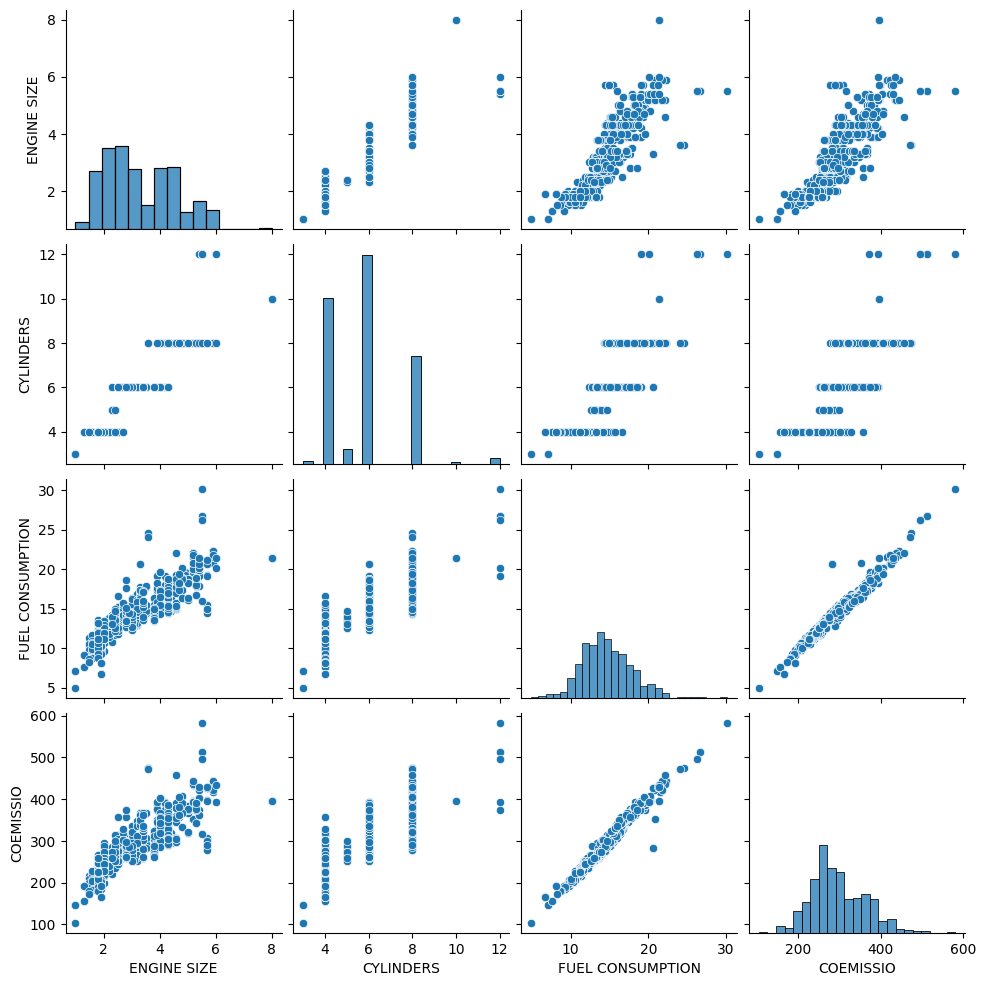

In [35]:
sns.pairplot(df)

<Axes: >

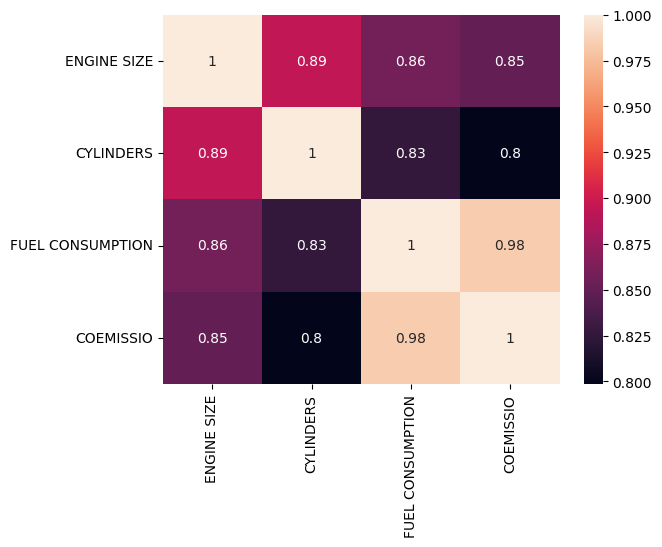

In [37]:
sns.heatmap(df.corr(),annot = True)

In [41]:
df.corr()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIO
ENGINE SIZE,1.000000,0.893819,0.858170,0.849714
CYLINDERS,0.893819,1.000000,0.825784,0.798447
FUEL CONSUMPTION,0.858170,0.825784,1.000000,0.983232
COEMISSIO,0.849714,0.798447,0.983232,1.000000


In [43]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [45]:
X, y

(     ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION
 0            1.6        4.0              10.5
 1            1.6        4.0               9.8
 2            3.2        6.0              13.7
 3            3.5        6.0              15.0
 4            1.8        4.0              11.4
 ..           ...        ...               ...
 634          2.4        5.0              14.4
 635          2.4        5.0              13.6
 636          2.3        5.0              13.9
 637          2.3        5.0              13.0
 638          2.4        5.0              14.7
 
 [639 rows x 3 columns],
 0      216.0
 1      205.0
 2      265.0
 3      301.0
 4      230.0
        ...  
 634    288.0
 635    274.0
 636    274.0
 637    260.0
 638    299.0
 Name: COEMISSIO, Length: 639, dtype: float64)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [57]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [61]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [77]:
# Evaluate the model
train_r2 = model.score(X_train_scaled, y_train)
test_r2 = model.score(X_test_scaled, y_test)
# mse = mse(y_test, y_pred)
# rmse = np.sqrt(mse)

print(f"R² score on training data: {train_r2}")
print(f"R² score on test data: {test_r2}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")

R² score on training data: 0.9626494451700328
R² score on test data: 0.9846361749926678


In [84]:
dat = scaler.transform([[1.6,4,10.5]])
model.predict(dat)

C:\Users\upadh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([213.48269139])

In [86]:
pickle.dump(model,open('model.pkl','wb'))

In [92]:
pickle.dump(scaler,open('scaler.pkl','wb'))